In [1]:
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
df = pd.read_csv(uri)
df.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Se quiser alterar nomes das colunas:
    
```
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()


In [4]:
# criando coluna de finalizados

troca = {0 : 1, 
         1 : 0 }

df['finished'] = df['unfinished'].map(troca)
df.tail()

,unfinished,expected_hours,price,finished
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1
2156,1,37,377,0


In [5]:
import seaborn as sns

<Axes: xlabel='expected_hours', ylabel='price'>

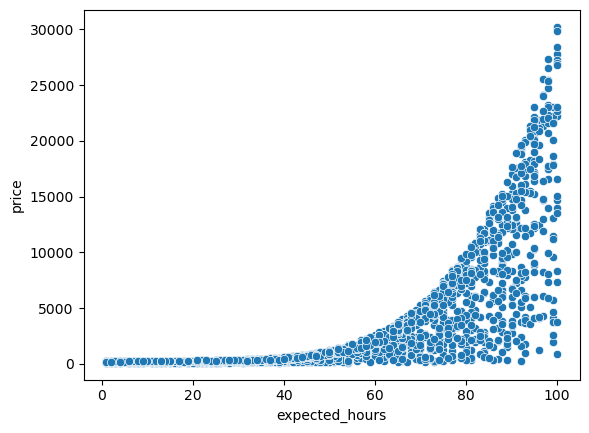

In [6]:
sns.scatterplot(data=df, x='expected_hours', y='price')

<Axes: xlabel='expected_hours', ylabel='price'>

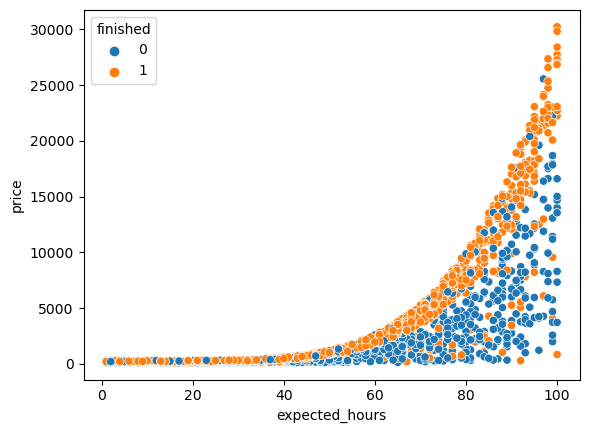

In [7]:
sns.scatterplot(data=df, x='expected_hours', y='price', 
                hue='finished')  # diferenciando por cor

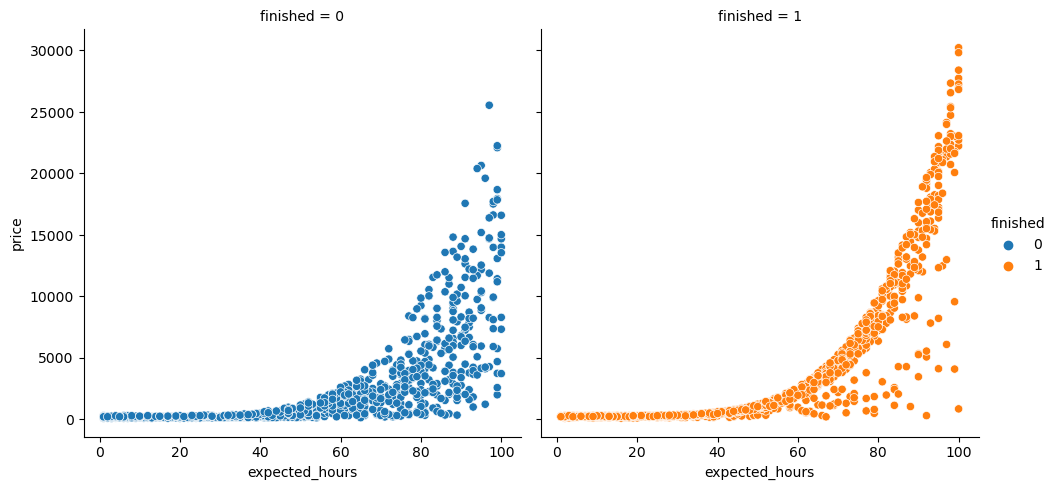

In [8]:
sns.relplot(data=df, x='expected_hours', y='price', 
            col='finished', hue='finished')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [10]:
X = df[['expected_hours', 'price']]
y = df['finished']

In [51]:
# Estratificando splits
SEED = 5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=SEED, stratify=y)
print(f'Treinaremos com {len(X_train)} elementos, e testaremos com {len(X_test)} elementos')

# Verificando proporções
proporcao_treino = (y_train.value_counts()[0] / y_train.value_counts()[1])
proporcao_teste = (y_test.value_counts()[0] / y_test.value_counts()[1])
print(f'Proporção treino: {proporcao_treino:.2f} | Proporção teste: {proporcao_teste:.2f}')

# Criando o modelo e verificando acurácia
model = LinearSVC(dual=True)
model.fit(X_train, y_train)
previsoes = model.predict(X_test)
accuracy = accuracy_score(y_test, previsoes)
print(f'Acurácia: {accuracy * 100 :.2f}%')

Treinaremos com 1617 elementos, e testaremos com 540 elementos
Proporção treino: 0.90 | Proporção teste: 0.90
Acurácia: 55.74%


#### A acurácia foi bem ruim

In [52]:
# teste rápido
import numpy as np
previsoes_de_base = np.ones(540)
accuracy = accuracy_score(y_test, previsoes_de_base)
print(f'Acurácia do algoritmo de baseline: {accuracy * 100 :.2f}%')

Acurácia do algoritmo de baseline: 52.59%


#### Esse teste de baseline foi taõ preciso quanto o modelo

# Curva de decisão

<Axes: xlabel='expected_hours', ylabel='price'>

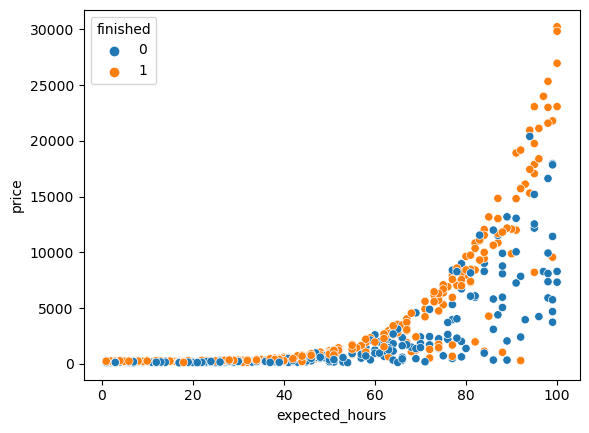

In [53]:
sns.scatterplot(data=X_test, x='expected_hours', y='price', hue=y_test)

In [54]:
x_min = X_test.expected_hours.min()
x_max = X_test.expected_hours.max()
y_min = X_test.price.min()
y_max = X_test.price.max()
print(x_min, x_max, y_min, y_max)

1 100 100 30223


In [55]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [56]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [57]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

In [58]:
import matplotlib.pyplot as plt

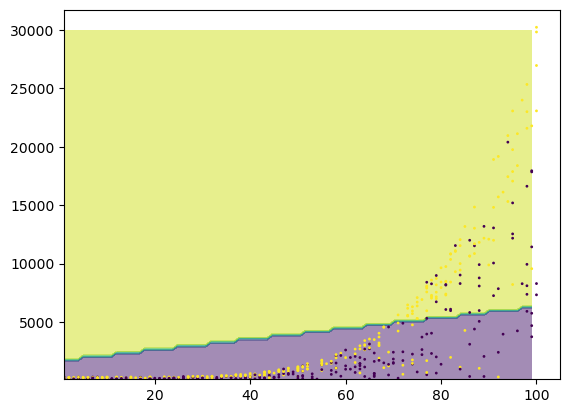

In [60]:
plt.contourf(xx, yy, Z, alpha=0.5)
plt.scatter(X_test.expected_hours, X_test.price, c=y_test, s=1)

# DECISION BOUNDARY

### Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para essa classificação.